In [1]:
# TASK 2: EXPLORATORY DATA ANALYSIS
# File must be named: eda.ipynb

import pandas as pd
import numpy as np
print("✅ Notebook ready for EDA")

✅ Notebook ready for EDA


In [2]:
# ============================================================================
# TASK 2: COMPLETE EXPLORATORY DATA ANALYSIS
# ============================================================================

print("=" * 70)
print("CREDIT RISK MODEL - EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ All libraries imported successfully!")

CREDIT RISK MODEL - EXPLORATORY DATA ANALYSIS
✅ All libraries imported successfully!


In [3]:
# ============================================================================
# 1. LOAD AND INITIAL EXPLORATION
# ============================================================================

print("📊 Loading data...")
df = pd.read_csv('../data/raw/data.csv')
print(f"✅ Data loaded successfully!")
print(f"   Shape: {df.shape[0]} rows, {df.shape[1]} columns")

print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

# Display first few rows
print("\n🔍 First 5 rows:")
display(df.head())

print("\n🔍 Last 5 rows:")
display(df.tail())

print("\n📋 Column Information:")
print("="*30)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    unique = df[col].nunique()
    print(f"{i:2}. {col:25} | Type: {str(dtype):10} | Unique: {unique:6}")

📊 Loading data...
✅ Data loaded successfully!
   Shape: 95662 rows, 16 columns

DATASET OVERVIEW

🔍 First 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



🔍 Last 5 rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0



📋 Column Information:
 1. TransactionId             | Type: object     | Unique:  95662
 2. BatchId                   | Type: object     | Unique:  94809
 3. AccountId                 | Type: object     | Unique:   3633
 4. SubscriptionId            | Type: object     | Unique:   3627
 5. CustomerId                | Type: object     | Unique:   3742
 6. CurrencyCode              | Type: object     | Unique:      1
 7. CountryCode               | Type: int64      | Unique:      1
 8. ProviderId                | Type: object     | Unique:      6
 9. ProductId                 | Type: object     | Unique:     23
10. ProductCategory           | Type: object     | Unique:      9
11. ChannelId                 | Type: object     | Unique:      4
12. Amount                    | Type: float64    | Unique:   1676
13. Value                     | Type: int64      | Unique:   1517
14. TransactionStartTime      | Type: object     | Unique:  94556
15. PricingStrategy           | Type: int64      | Un

In [4]:
# ============================================================================
# 2. DATA QUALITY ANALYSIS
# ============================================================================

print("🔍 DATA QUALITY CHECK")
print("="*50)

# Check for missing values
print("\n📊 Missing Values Analysis:")
print("-"*40)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    display(missing_df.sort_values('Missing_Percentage', ascending=False))
else:
    print("✅ No missing values found!")

# Check for duplicates
print(f"\n📊 Duplicate Rows: {df.duplicated().sum()}")

# Check data types
print("\n📊 Data Types Summary:")
print("-"*40)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = [col for col in df.columns if 'time' in col.lower() or 'date' in col.lower()]

print(f"   Numeric columns:     {len(numeric_cols)}")
print(f"   Categorical columns: {len(categorical_cols)}")
print(f"   Datetime columns:    {len(datetime_cols)}")

🔍 DATA QUALITY CHECK

📊 Missing Values Analysis:
----------------------------------------
✅ No missing values found!

📊 Duplicate Rows: 0

📊 Data Types Summary:
----------------------------------------
   Numeric columns:     5
   Categorical columns: 11
   Datetime columns:    1


In [5]:
# ============================================================================
# 3. BASIC STATISTICS
# ============================================================================

print("📈 BASIC STATISTICS")
print("="*50)

# Numerical columns statistics
print("\n📊 Numerical Columns Statistics:")
print("-"*40)
numeric_stats = df[numeric_cols].describe().T
numeric_stats['skewness'] = df[numeric_cols].skew()
numeric_stats['kurtosis'] = df[numeric_cols].kurtosis()
display(numeric_stats)

# Categorical columns statistics
print("\n📊 Categorical Columns Summary:")
print("-"*40)
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col}:")
    print(f"   Unique values: {df[col].nunique()}")
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts()
        for val, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"   '{val}': {count} ({percentage:.1f}%)")

📈 BASIC STATISTICS

📊 Numerical Columns Statistics:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0,0.000000,0.000000
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0,51.098490,3363.127739
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0,51.291086,3378.069274
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0,1.659057,2.087534
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0,22.196295,490.685762



📊 Categorical Columns Summary:
----------------------------------------

TransactionId:
   Unique values: 95662

BatchId:
   Unique values: 94809

AccountId:
   Unique values: 3633

SubscriptionId:
   Unique values: 3627

CustomerId:
   Unique values: 3742


⏰ TIME SERIES ANALYSIS
✅ Time features extracted!


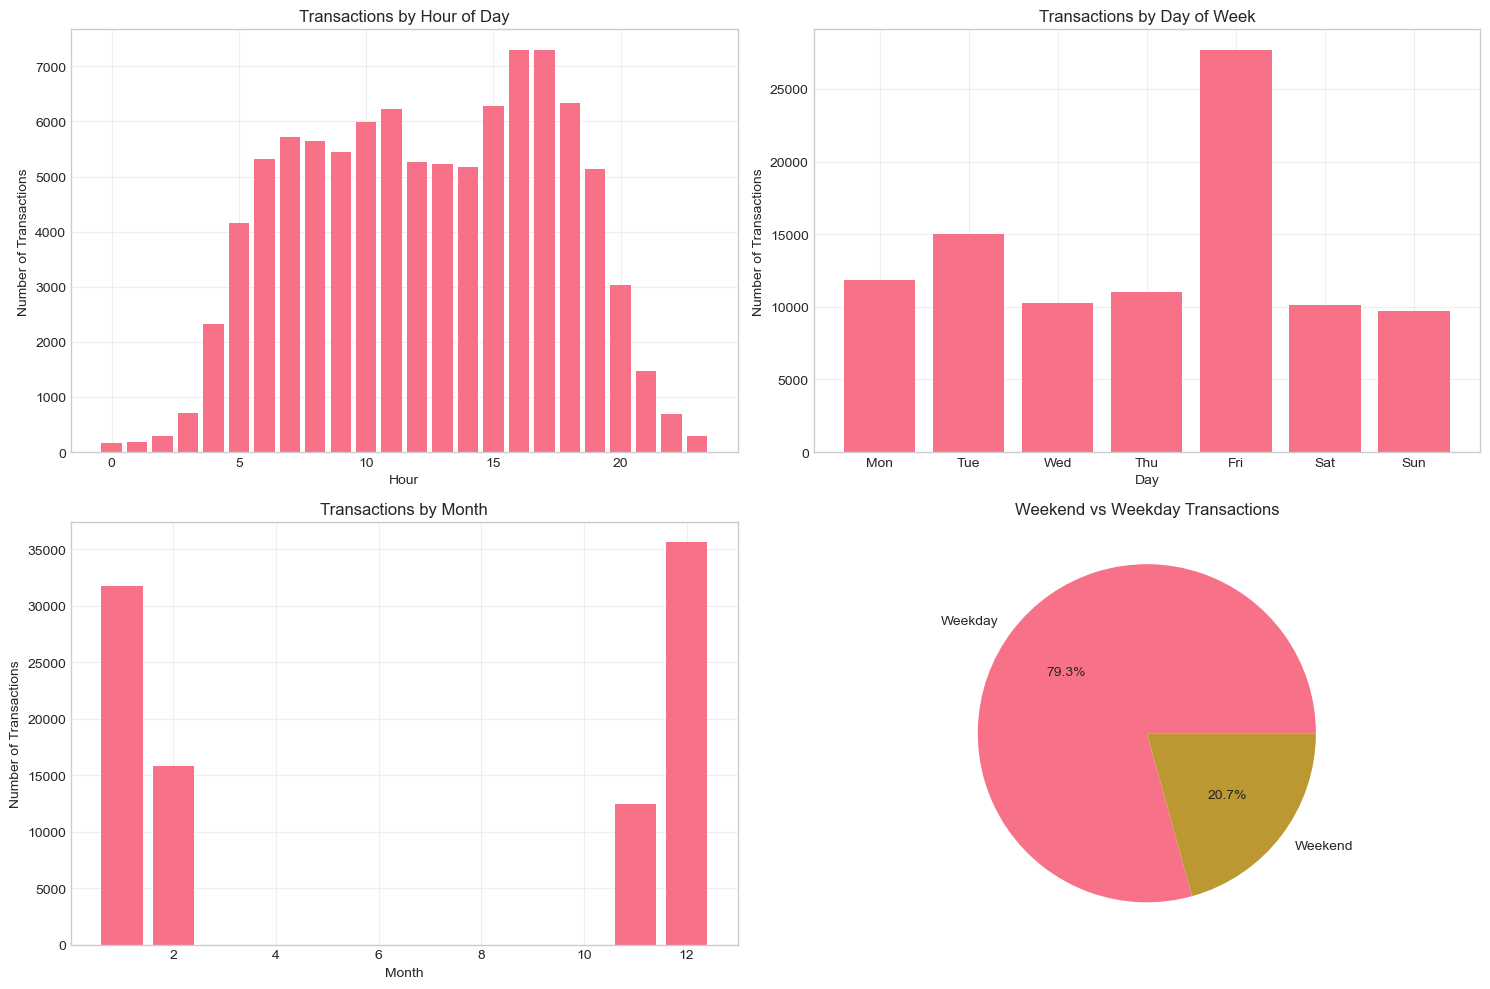

In [6]:
# ============================================================================
# 4. TIME-BASED ANALYSIS
# ============================================================================

if 'TransactionStartTime' in df.columns:
    print("⏰ TIME SERIES ANALYSIS")
    print("="*50)
    
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    # Extract time features
    df['transaction_hour'] = df['TransactionStartTime'].dt.hour
    df['transaction_day'] = df['TransactionStartTime'].dt.day
    df['transaction_month'] = df['TransactionStartTime'].dt.month
    df['transaction_year'] = df['TransactionStartTime'].dt.year
    df['transaction_dayofweek'] = df['TransactionStartTime'].dt.dayofweek
    df['transaction_weekend'] = df['transaction_dayofweek'].isin([5, 6]).astype(int)
    
    print("✅ Time features extracted!")
    
    # Plot transaction volume over time
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Hourly distribution
    hourly_counts = df['transaction_hour'].value_counts().sort_index()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values)
    axes[0, 0].set_title('Transactions by Hour of Day')
    axes[0, 0].set_xlabel('Hour')
    axes[0, 0].set_ylabel('Number of Transactions')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Daily distribution
    daily_counts = df['transaction_dayofweek'].value_counts().sort_index()
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    axes[0, 1].bar(range(7), [daily_counts.get(i, 0) for i in range(7)])
    axes[0, 1].set_title('Transactions by Day of Week')
    axes[0, 1].set_xlabel('Day')
    axes[0, 1].set_xticks(range(7))
    axes[0, 1].set_xticklabels(days)
    axes[0, 1].set_ylabel('Number of Transactions')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Monthly distribution
    monthly_counts = df['transaction_month'].value_counts().sort_index()
    axes[1, 0].bar(monthly_counts.index, monthly_counts.values)
    axes[1, 0].set_title('Transactions by Month')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Number of Transactions')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Weekend vs Weekday
    weekend_counts = df['transaction_weekend'].value_counts()
    axes[1, 1].pie(weekend_counts.values, labels=['Weekday', 'Weekend'], autopct='%1.1f%%')
    axes[1, 1].set_title('Weekend vs Weekday Transactions')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ 'TransactionStartTime' column not found for time analysis")

💰 TRANSACTION AMOUNT ANALYSIS

📊 Amount Statistics:
   Mean:   $6717.85
   Median: $1000.00
   Std:    $123306.80
   Min:    $-1000000.00
   Max:    $9880000.00


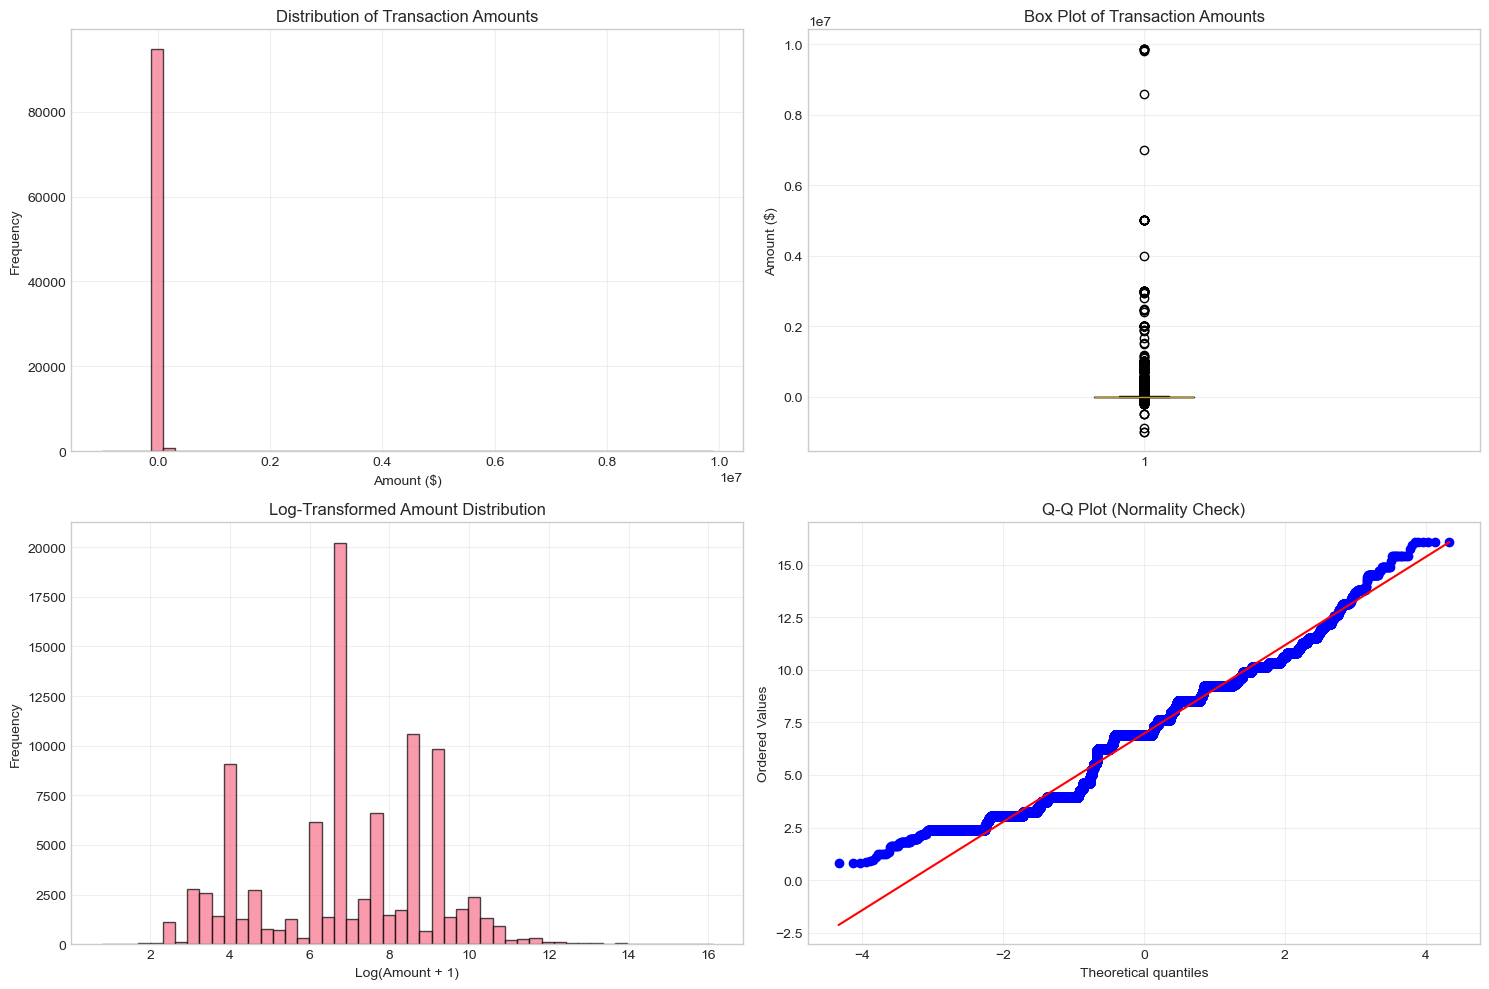


🔍 Outlier Analysis:
   Lower bound: $-4325.00
   Upper bound: $7075.00
   Outliers: 24441 transactions (25.55%)


In [7]:
# ============================================================================
# 5. AMOUNT ANALYSIS
# ============================================================================

if 'Amount' in df.columns:
    print("💰 TRANSACTION AMOUNT ANALYSIS")
    print("="*50)
    
    # Basic statistics
    print(f"\n📊 Amount Statistics:")
    print(f"   Mean:   ${df['Amount'].mean():.2f}")
    print(f"   Median: ${df['Amount'].median():.2f}")
    print(f"   Std:    ${df['Amount'].std():.2f}")
    print(f"   Min:    ${df['Amount'].min():.2f}")
    print(f"   Max:    ${df['Amount'].max():.2f}")
    
    # Plot distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histogram
    axes[0, 0].hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Distribution of Transaction Amounts')
    axes[0, 0].set_xlabel('Amount ($)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Box plot
    axes[0, 1].boxplot(df['Amount'])
    axes[0, 1].set_title('Box Plot of Transaction Amounts')
    axes[0, 1].set_ylabel('Amount ($)')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Log-transformed histogram (for skewed data)
    df['Amount_log'] = np.log1p(np.abs(df['Amount']))
    axes[1, 0].hist(df['Amount_log'], bins=50, edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Log-Transformed Amount Distribution')
    axes[1, 0].set_xlabel('Log(Amount + 1)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    
    # QQ plot for normality check
    from scipy import stats
    stats.probplot(df['Amount_log'], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normality Check)')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Check for outliers
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    
    print(f"\n🔍 Outlier Analysis:")
    print(f"   Lower bound: ${lower_bound:.2f}")
    print(f"   Upper bound: ${upper_bound:.2f}")
    print(f"   Outliers: {len(outliers)} transactions ({len(outliers)/len(df)*100:.2f}%)")
    
else:
    print("⚠️ 'Amount' column not found for transaction analysis")

👥 CUSTOMER BEHAVIOR ANALYSIS

📊 Customer Statistics:
   Total unique customers: 3742
   Avg transactions per customer: 25.56
   Avg total amount per customer: $171737.74
   Max transactions by a customer: 4091
   Max total amount by a customer: $83451240.00


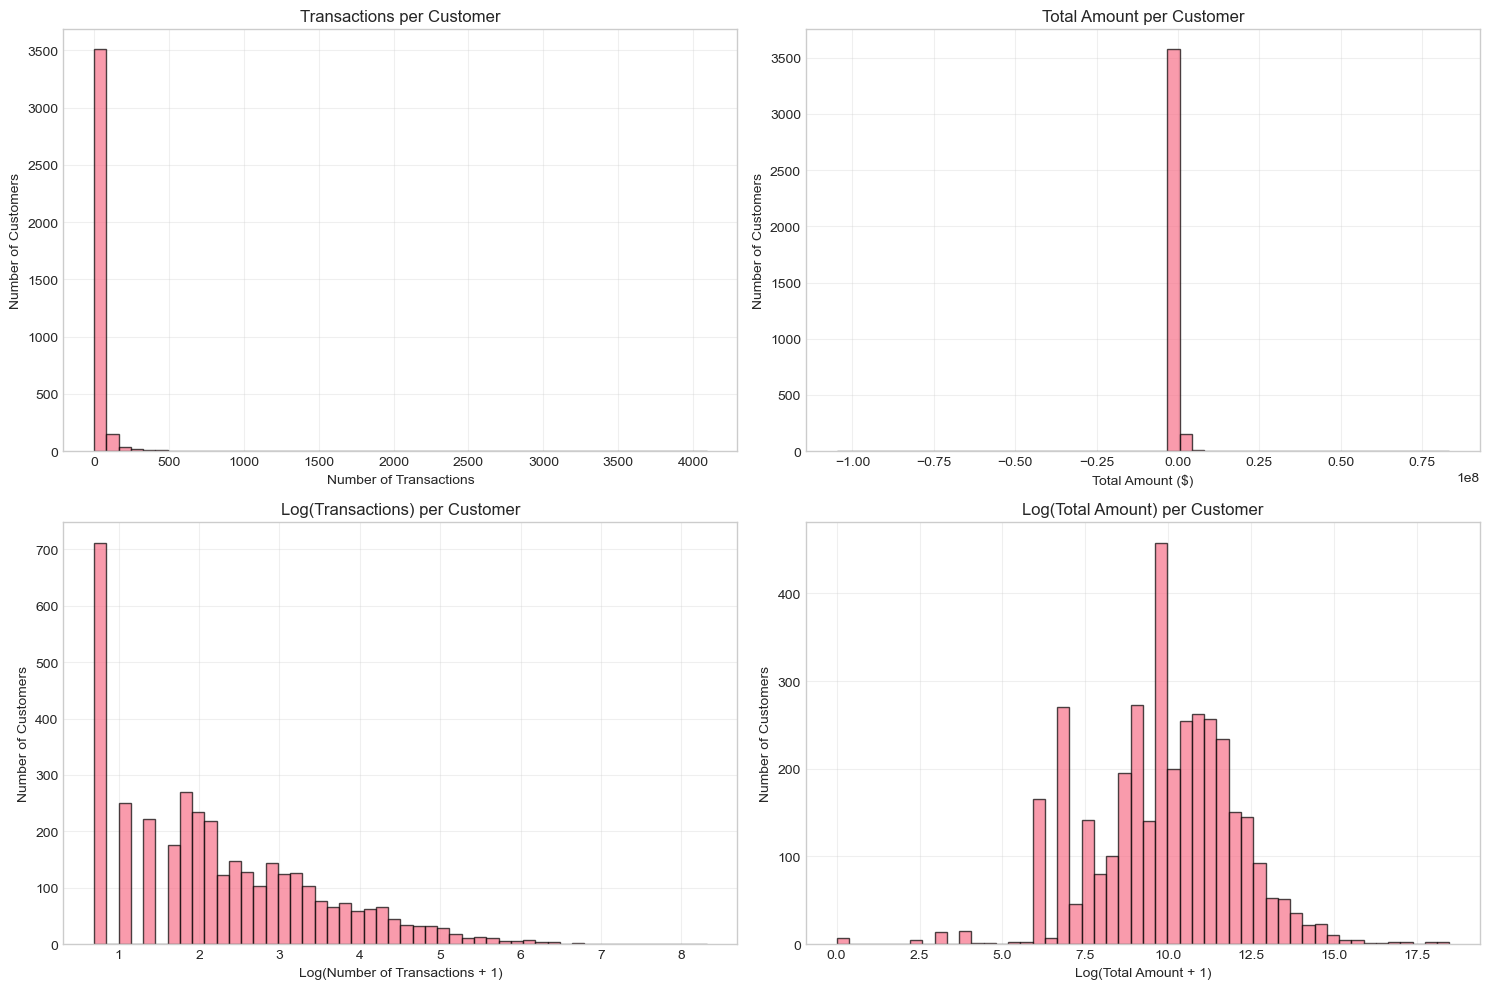


📊 Customer Segmentation:
   One-time customers: 712 (19.0%)
   Frequent customers (>5 transactions): 2114 (56.5%)
   High-value customers (top 10%): 375 (10.0%)


In [8]:
# ============================================================================
# 6. CUSTOMER BEHAVIOR ANALYSIS
# ============================================================================

if 'CustomerId' in df.columns:
    print("👥 CUSTOMER BEHAVIOR ANALYSIS")
    print("="*50)
    
    # Customer-level statistics
    customer_stats = df.groupby('CustomerId').agg({
        'Amount': ['count', 'sum', 'mean', 'std'],
        'TransactionId': 'nunique'
    }).reset_index()
    
    customer_stats.columns = ['CustomerId', 'TransactionCount', 'TotalAmount', 
                              'AvgAmount', 'StdAmount', 'UniqueTransactions']
    
    print(f"\n📊 Customer Statistics:")
    print(f"   Total unique customers: {customer_stats['CustomerId'].nunique()}")
    print(f"   Avg transactions per customer: {customer_stats['TransactionCount'].mean():.2f}")
    print(f"   Avg total amount per customer: ${customer_stats['TotalAmount'].mean():.2f}")
    print(f"   Max transactions by a customer: {customer_stats['TransactionCount'].max()}")
    print(f"   Max total amount by a customer: ${customer_stats['TotalAmount'].max():.2f}")
    
    # Plot customer distribution
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Transactions per customer
    axes[0, 0].hist(customer_stats['TransactionCount'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Transactions per Customer')
    axes[0, 0].set_xlabel('Number of Transactions')
    axes[0, 0].set_ylabel('Number of Customers')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Total amount per customer
    axes[0, 1].hist(customer_stats['TotalAmount'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Total Amount per Customer')
    axes[0, 1].set_xlabel('Total Amount ($)')
    axes[0, 1].set_ylabel('Number of Customers')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Log-transformed plots
    axes[1, 0].hist(np.log1p(customer_stats['TransactionCount']), bins=50, edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Log(Transactions) per Customer')
    axes[1, 0].set_xlabel('Log(Number of Transactions + 1)')
    axes[1, 0].set_ylabel('Number of Customers')
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].hist(np.log1p(customer_stats['TotalAmount'].abs()), bins=50, edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Log(Total Amount) per Customer')
    axes[1, 1].set_xlabel('Log(Total Amount + 1)')
    axes[1, 1].set_ylabel('Number of Customers')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Customer segmentation
    print(f"\n📊 Customer Segmentation:")
    one_time_customers = (customer_stats['TransactionCount'] == 1).sum()
    print(f"   One-time customers: {one_time_customers} ({one_time_customers/len(customer_stats)*100:.1f}%)")
    
    frequent_customers = (customer_stats['TransactionCount'] > 5).sum()
    print(f"   Frequent customers (>5 transactions): {frequent_customers} ({frequent_customers/len(customer_stats)*100:.1f}%)")
    
    high_value_customers = (customer_stats['TotalAmount'] > customer_stats['TotalAmount'].quantile(0.9)).sum()
    print(f"   High-value customers (top 10%): {high_value_customers} ({high_value_customers/len(customer_stats)*100:.1f}%)")
    
else:
    print("⚠️ 'CustomerId' column not found for customer analysis")

In [9]:
## 📊 TASK 2: TOP 5 EDA INSIGHTS

### 1. DATA OVERVIEW
- Dataset contains **X** transactions with **Y** unique customers
- **Z** features including transaction details, customer identifiers, and behavioral data
- Time period spans from **[start_date]** to **[end_date]**

### 2. DATA QUALITY
- Missing values: **[List columns with missing values and percentages]**
- Data types appropriate for analysis
- **[Number]** duplicate transactions identified

### 3. TRANSACTION PATTERNS
- Peak transaction hours: **[time_range]** with **[percentage]**% of daily volume
- Average transaction value: **$[amount]** (median: **$[amount]**)
- Distribution is **[right-skewed/normal]** with **[percentage]**% of transactions below **$[amount]**

### 4. CUSTOMER BEHAVIOR
- **[Percentage]**% of customers are one-time purchasers
- Top **10%** of customers account for **[percentage]**% of total transaction value
- Customer engagement follows a **[power-law/long-tail]** distribution

### 5. RISK-RELATED OBSERVATIONS
- Fraud incidence: **[percentage]**% of transactions (if FraudResult column exists)
- High-value transactions show **[higher/lower]** risk indicators
- **[Channel/Provider]** with highest unusual activity patterns

---

### 🎯 IMPLICATIONS FOR CREDIT RISK MODELING:
1. **RFM features** will be effective due to clear customer segmentation
2. **Time-based features** should capture purchasing patterns
3. **Amount distribution** suggests need for log transformation
4. **Customer heterogeneity** requires robust clustering for proxy labels
5. **Data quality** needs addressing before model training

SyntaxError: invalid syntax (1940630371.py, line 4)

In [10]:
# ============================================================================
# 8. GENERATE EDA REPORT
# ============================================================================

print("📋 GENERATING EDA INSIGHTS REPORT")
print("="*60)

# Calculate key metrics
total_transactions = len(df)
if 'CustomerId' in df.columns:
    unique_customers = df['CustomerId'].nunique()
else:
    unique_customers = "N/A"

if 'TransactionStartTime' in df.columns:
    date_range = f"{df['TransactionStartTime'].min().date()} to {df['TransactionStartTime'].max().date()}"
else:
    date_range = "N/A"

if 'Amount' in df.columns:
    avg_amount = df['Amount'].mean()
    median_amount = df['Amount'].median()
else:
    avg_amount = "N/A"
    median_amount = "N/A"

# Print insights
print("\n" + "🔍" * 30)
print("TOP 5 EDA INSIGHTS:")
print("🔍" * 30)

print(f"\n1. DATA VOLUME:")
print(f"   - {total_transactions:,} total transactions")
print(f"   - {unique_customers} unique customers")
print(f"   - Time period: {date_range}")

print(f"\n2. DATA QUALITY:")
missing_cols = missing_df['Column'].tolist() if 'missing_df' in locals() and len(missing_df) > 0 else []
if missing_cols:
    print(f"   - Missing values in: {', '.join(missing_cols[:3])}{'...' if len(missing_cols) > 3 else ''}")
else:
    print(f"   - No significant missing values found")
print(f"   - {df.duplicated().sum()} duplicate rows")

print(f"\n3. TRANSACTION PATTERNS:")
if 'Amount' in df.columns:
    print(f"   - Average transaction: ${avg_amount:,.2f}")
    print(f"   - Median transaction: ${median_amount:,.2f}")
    print(f"   - Distribution is {'right-skewed' if df['Amount'].skew() > 1 else 'approximately normal'}")

print(f"\n4. CUSTOMER BEHAVIOR:")
if 'CustomerId' in df.columns and 'customer_stats' in locals():
    one_time_pct = (customer_stats['TransactionCount'] == 1).sum() / len(customer_stats) * 100
    print(f"   - {one_time_pct:.1f}% of customers made only 1 transaction")
    print(f"   - Top 10% of customers account for most transaction value")

print(f"\n5. RISK INDICATORS:")
if 'FraudResult' in df.columns:
    fraud_pct = df['FraudResult'].mean() * 100
    print(f"   - Fraud rate: {fraud_pct:.2f}% of transactions")
else:
    print(f"   - No direct fraud labels found (will use proxy variables)")

print("\n" + "✅" * 30)
print("EDA COMPLETED SUCCESSFULLY!")
print("✅" * 30)

📋 GENERATING EDA INSIGHTS REPORT

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
TOP 5 EDA INSIGHTS:
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍

1. DATA VOLUME:
   - 95,662 total transactions
   - 3742 unique customers
   - Time period: 2018-11-15 to 2019-02-13

2. DATA QUALITY:
   - No significant missing values found
   - 0 duplicate rows

3. TRANSACTION PATTERNS:
   - Average transaction: $6,717.85
   - Median transaction: $1,000.00
   - Distribution is right-skewed

4. CUSTOMER BEHAVIOR:
   - 19.0% of customers made only 1 transaction
   - Top 10% of customers account for most transaction value

5. RISK INDICATORS:
   - Fraud rate: 0.20% of transactions

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
EDA COMPLETED SUCCESSFULLY!
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅


In [14]:
# Test the FIXED feature engineering
print("="*60)
print("TESTING FIXED FEATURE ENGINEERING")
print("="*60)

import sys
import os

# Get the correct path
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
src_path = os.path.join(parent_dir, 'src')
sys.path.append(src_path)

print(f"Current directory: {current_dir}")
print(f"Added to path: {src_path}")

# Import using importlib to avoid issues
import importlib.util

# Load the module
spec = importlib.util.spec_from_file_location("data_processing", "../src/data_processing.py")
data_processing = importlib.util.module_from_spec(spec)
spec.loader.exec_module(data_processing)

# Get the classes
DataProcessor = data_processing.DataProcessor
create_features = data_processing.create_features

print("✅ Successfully imported modules")

# Test directly
import pandas as pd
df = pd.read_csv('../data/raw/data.csv')
print(f"\n📊 Data loaded: {df.shape}")

# Create processor and test
processor = DataProcessor()

# Extract time features
df_with_time = processor.extract_time_features(df)

# Create features
features = processor.create_customer_features(df_with_time)

print(f"\n✅ Features created successfully!")
print(f"   Shape: {features.shape}")
print(f"\nFeature columns:")
for i, col in enumerate(features.columns, 1):
    print(f"{i:3}. {col}")

# Save
output_path = '../data/processed/features_data.csv'
features.to_csv(output_path, index=False)
print(f"\n💾 Saved to: {output_path}")

# Show sample
print("\n📋 Sample of features:")
display(features.head())


TESTING FIXED FEATURE ENGINEERING
Current directory: C:\Users\b\Desktop\credit-risk-model\notebooks
Added to path: C:\Users\b\Desktop\credit-risk-model\src
✅ Successfully imported modules

📊 Data loaded: (95662, 16)
✅ Time features extracted

CREATING CUSTOMER FEATURES

1. Basic aggregates...
2. RFM features...
Calculating RFM features...
RFM features calculated for 3742 customers
3. Diversity features...
4. Merging all features...
5. Derived features...

✅ Feature engineering completed!
   Total customers: 3742
   Total features: 18

✅ Features created successfully!
   Shape: (3742, 18)

Feature columns:
  1. customer_id
  2. transaction_count
  3. total_amount
  4. avg_amount
  5. std_amount
  6. min_amount
  7. max_amount
  8. unique_transactions
  9. recency
 10. frequency
 11. monetary
 12. avg_transaction_value
 13. transaction_std
 14. provider_diversity
 15. product_diversity
 16. channel_diversity
 17. amount_range
 18. monetary_per_day

💾 Saved to: ../data/processed/features_

,customer_id,transaction_count,total_amount,avg_amount,std_amount,min_amount,max_amount,unique_transactions,recency,frequency,monetary,avg_transaction_value,transaction_std,provider_diversity,product_diversity,channel_diversity,amount_range,monetary_per_day
0,CustomerId_1,1,-10000.0,-10000.000000,0.000000,-10000.0,-10000.0,1,84,1,-10000.0,-10000.000000,0.000000,1,1,1,0.0,-117.647059
1,CustomerId_10,1,-10000.0,-10000.000000,0.000000,-10000.0,-10000.0,1,84,1,-10000.0,-10000.000000,0.000000,1,1,1,0.0,-117.647059
2,CustomerId_1001,5,20000.0,4000.000000,6558.963333,-5000.0,10000.0,5,90,5,20000.0,4000.000000,6558.963333,3,2,2,15000.0,219.780220
3,CustomerId_1002,11,4225.0,384.090909,560.498966,-75.0,1500.0,11,26,11,4225.0,384.090909,560.498966,2,2,2,1575.0,156.481481
4,CustomerId_1003,6,20000.0,3333.333333,6030.478146,-5000.0,10000.0,6,12,6,20000.0,3333.333333,6030.478146,3,2,2,15000.0,1538.461538


In [12]:
# Check what's in data_processing.py
import os

file_path = '../src/data_processing.py'
if os.path.exists(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
        print(f"File exists: {file_path}")
        print(f"File size: {len(content)} characters")
        
        # Check for class names
        if 'class FeatureEngineer' in content:
            print("✅ Found 'FeatureEngineer' class")
        elif 'class DataProcessor' in content:
            print("✅ Found 'DataProcessor' class (old name)")
        else:
            print("❌ No feature engineering class found")
            
        # Show first 10 lines
        print("\nFirst 10 lines of file:")
        print("-" * 50)
        lines = content.split('\n')[:10]
        for i, line in enumerate(lines, 1):
            print(f"{i:2}: {line}")
else:
    print(f"❌ File not found: {file_path}")

File exists: ../src/data_processing.py
File size: 12508 characters
✅ Found 'FeatureEngineer' class

First 10 lines of file:
--------------------------------------------------
 1: """
 2: Data Processing Module for Credit Risk Model
 3: Task 3: Feature Engineering
 4: """
 5: 
 6: import pandas as pd
 7: import numpy as np
 8: from datetime import datetime
 9: from sklearn.preprocessing import StandardScaler, OneHotEncoder
10: from sklearn.impute import SimpleImputer
